## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [6]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
path = '/Users/balachandark/Desktop/Achievement 6'

In [8]:
df = pd.read_csv(os.path.join(path, 'Cleaned Data', 'clean_clv_data.csv'))

In [9]:
df.shape

(9134, 25)

In [10]:
df.head()

,Unnamed: 0,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,months_since_policy_inception,no_of_open_complaints,no_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim,vehicle_class,vehicle_size
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employment_status', 'gender', 'income', 'region', 'marital_status',
       'monthly_premium', 'months_since_last_claim',
       'months_since_policy_inception', 'no_of_open_complaints',
       'no_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim', 'vehicle_class', 'vehicle_size'],
      dtype='object')

### 2. The elbow technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

#### Selecting Numerical columns and Standardizing the data

In [24]:
## Removing non-numerical columns for kmeans clustering

df_temp = df.drop(columns = ['Unnamed: 0', 'customer_id', 'state', 'coverage', 'effective_to_date', 'response', 'employment_status', 'education', 'gender', 'region',
                             'marital_status', 'policy_type', 'policy', 'renew_offer_type',
                             'sales_channel', 'vehicle_class', 'vehicle_size'], axis=1)

## Normalizing dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_temp)

## Converting scaled data into dataframe
scaled_df = pd.DataFrame(scaled_data, columns=df_temp.columns)

In [26]:
score = [kmeans[i].fit(scaled_data).score(scaled_data) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.


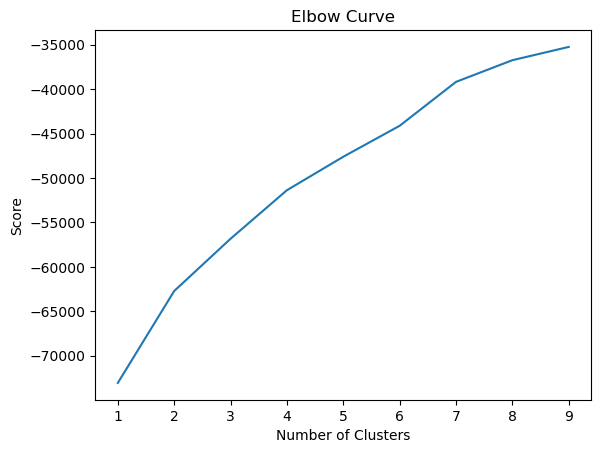

In [27]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [32]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [34]:
# Fit the k-means object to the data.

kmeans.fit(df_temp)

KMeans(n_clusters=3)

In [36]:
df['clusters'] = kmeans.fit_predict(df_temp)

In [38]:
df.head()

,Unnamed: 0,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,no_of_open_complaints,no_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim,vehicle_class,vehicle_size,clusters
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02,Employed,M,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [40]:
df['clusters'].value_counts()

clusters
2    3481
0    2916
1    2737
Name: count, dtype: int64

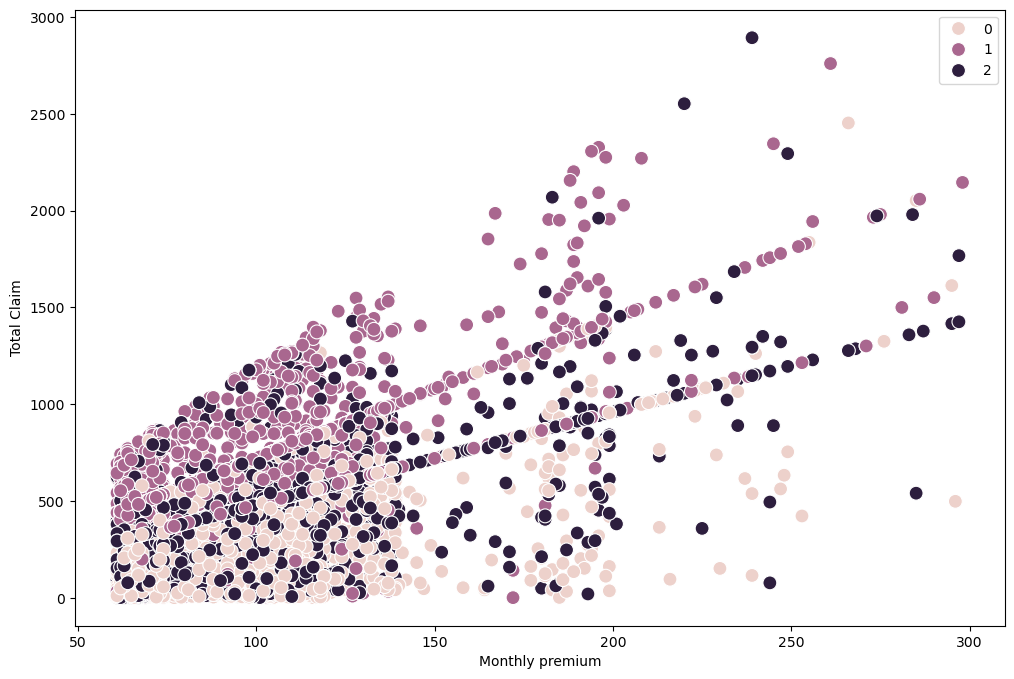

In [42]:
# Plot the clusters for the "Monthly premium" and "Total claim" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['monthly_premium'], y=df['total_claim'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Monthly premium') # Label x-axis.
plt.ylabel('Total Claim') # Label y-axis.
plt.show()

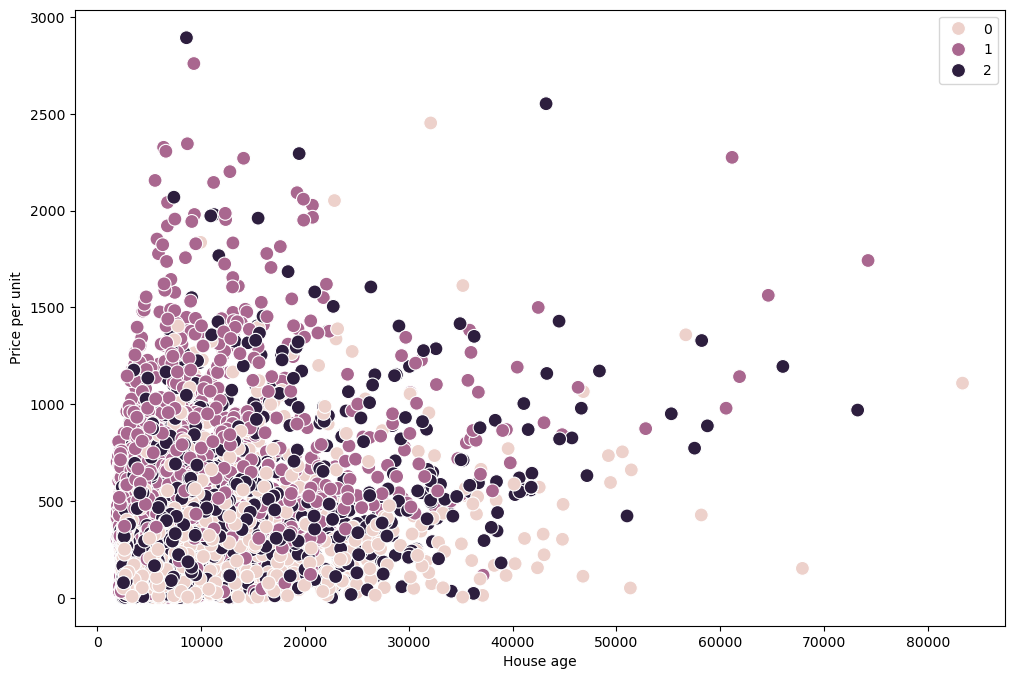

In [44]:
# Plot the clusters for the "Vehicle size" and "Total claim" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['customer_lifetime_value'], y=df['total_claim'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('House age') 
plt.ylabel('Price per unit') 
plt.show()

In [46]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [48]:
df.to_csv(os.path.join(path, 'Cleaned Data', 'cluster_df.csv'))

In [50]:
df_temp.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium',
       'months_since_last_claim', 'months_since_policy_inception',
       'no_of_open_complaints', 'no_of_policies', 'total_claim'],
      dtype='object')

In [52]:
np.transpose(df.groupby('cluster').agg({'customer_lifetime_value':['mean', 'median'], 
                         'income':['mean', 'median'], 
                         'monthly_premium':['mean', 'median'],
                          'no_of_policies':['mean', 'median'],
                         'total_claim':['mean', 'median'],
                         'months_since_policy_inception':['mean', 'median'],
                        'no_of_open_complaints':['mean', 'median']
}))

cluster                                dark purple          pink       purple
customer_lifetime_value       mean     8137.786164   8151.516007  7679.821698
                              median   5791.012841   5847.800438  5568.947534
income                        mean    34401.131284  74819.817215  2205.913043
                              median  33060.000000  73604.000000     0.000000
monthly_premium               mean       92.673082     92.826132    94.332846
                              median     82.000000     83.000000    84.000000
no_of_policies                mean        2.972709      2.938957     2.986847
                              median      2.000000      2.000000     2.000000
total_claim                   mean      407.760473    324.078561   584.778865
                              median    362.989533    307.200000   513.600000
months_since_policy_inception mean       47.532893     48.570645    48.201681
                              median     47.000000     48.000000    48.000000
no_of_open_complaints         mean        0.393278      0.385460     0.371940
                              median      0.000000      0.000000     0.000000

## Comments on the results

#### Dark purple: Low insurance claimers 

The dark purple clusters are characterized with the least amount of claim from the insurance company. 
Further, as predicted earlier in the previous exercises they have the highest average income. 

#### Pink: High insurance claimers

The pink cluster customers has highest amount of claims with least average income levels. 

#### Purple: Moderate insurance claimers

The purple customers are the moderate insurance claimers with moderate income.

## Conclusion:

From the k-means clustering results, we were able to identify three distinct clusters. And these three clusters are formed based on the income and total claims rather than other variables. Hence, the company can create products or marketing messages based on the clusters to make their company profitable. 